# Preface

Purpose:

Covid-19 Analysis with Weather Data (Temp and Humidity) for seleceted two Cities- Sao Paulo(Brazil) and New York (USA) to show if these weather variables impact Covid new cases increase.

Data:

1. Resources folder under Main Branch- https://github.com/archinarula/Group-5-Project/Resources


# Dependencies and Load Data

In [3]:
# first import the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

## Import the combined data

In [4]:
# Add the Resources path variables:
Combined_data="Resources/Final_Combine_Data.csv"

#Read CSVs and Create Dataframes:
Combined_df_all= pd.read_csv(Combined_data, parse_dates=['Reported_Date'], encoding="ISO-8859-1",low_memory=False)


In [5]:
#Combined dataframe
print (Combined_df_all.shape)
Combined_df_all.head()


(886, 16)


,Extract_Date,Reported_Date,City,is_newyork,Population,Data_Source,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [7]:
# Delete extraneous columns
Combined_df=Combined_df_all.drop(["is_newyork","Population","Data_Source"], axis=1)
Combined_df.head()

,Extract_Date,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [8]:
Combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Extract_Date                  886 non-null    object        
 1   Reported_Date                 886 non-null    datetime64[ns]
 2   City                          886 non-null    object        
 3   New_Cases                     886 non-null    int64         
 4   mavg_7day_new_cases           886 non-null    float64       
 5   new_cases_per_100K            886 non-null    float64       
 6   mavg_7day_per_100k_new_cases  886 non-null    float64       
 7   daily_temp                    886 non-null    float64       
 8   daily_humidity                886 non-null    float64       
 9   mavg_7_temp                   886 non-null    float64       
 10  mavg_7_humidity               886 non-null    float64       
 11  mavg_15_temp                  88

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
#extract only NY data
NY_Combined_df = Combined_df.loc[Combined_df['City']=='New York']
print (NY_Combined_df.shape)
NY_Combined_df.head()

(443, 13)


,Extract_Date,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [11]:
#extract only SP data
SP_Combined_df = Combined_df.loc[Combined_df['City']=='Sao Paulo']
print (SP_Combined_df.shape)
SP_Combined_df.head()

(443, 13)


,Extract_Date,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,2021-05-30,2020-02-29,Sao Paulo,0,0.20,0.00,0.0,20.47,85.96,20.224286,83.507143,22.213333,80.343333
444,2021-05-30,2020-03-01,Sao Paulo,0,0.17,0.00,0.0,19.50,85.50,20.374286,83.578571,22.159333,80.812667
445,2021-05-30,2020-03-02,Sao Paulo,0,0.14,0.00,0.0,19.61,85.81,20.490000,84.471429,21.902000,81.646000
446,2021-05-30,2020-03-03,Sao Paulo,0,0.14,0.00,0.0,19.17,85.53,20.321429,85.334286,21.606667,82.187333
447,2021-05-30,2020-03-04,Sao Paulo,1,0.29,0.01,0.0,19.61,79.08,19.787143,85.832857,21.242000,82.764000


## Linear Regression Analysis-Both Cities

In [12]:
print(Combined_df_all.shape)
Combined_df_all.head()


(886, 16)


,Extract_Date,Reported_Date,City,is_newyork,Population,Data_Source,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,1,18804000,https://github.com/nychealth/coronavirus-data/...,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [13]:
Combined_df_all_Reg= Combined_df_all.drop(["Reported_Date","City","Population","Data_Source"], axis=1)
Combined_df_all_Reg.head()

,Extract_Date,is_newyork,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,1,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,1,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,1,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,1,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,1,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


### Regression Visual- 15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'

<AxesSubplot:xlabel='mavg_15_humidity', ylabel='mavg_7day_per_100k_new_cases'>

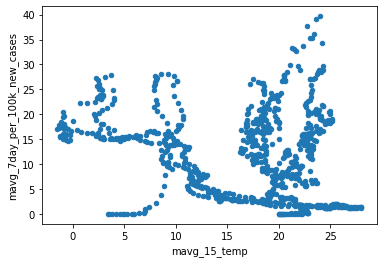

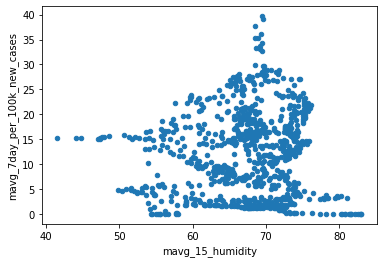

In [14]:
# Plot a scatter plot of '15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'
Combined_df_all_Reg.plot(kind='scatter', x='mavg_15_temp', y='mavg_7day_per_100k_new_cases')
Combined_df_all_Reg.plot(kind='scatter', x='mavg_15_humidity', y='mavg_7day_per_100k_new_cases')

### Simple Linear Regression Model- TEMPRETURE, HUMIDITY, CITY CODE with MAVG_7day_per_100k_new_cases


In [15]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Use the Sklearn `train_test_split()` function to split the data into training

In [16]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_all = Combined_df_all_Reg[["mavg_15_temp","mavg_15_humidity","is_newyork"]]
y_all = Combined_df_all_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_all.shape, y_all.shape)
#print(X_all)
#print(y_all)

Shape:  (886, 3) (886, 1)


In [17]:
#WE are not splitting the data as we want to use all data into the train  
#X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, random_state=42,stratify = True)
#X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, train_size=1.0,test_size=0.0, random_state=42)

In [18]:
# Create the model
model_all = linear_model.LinearRegression()
# Fit the model to the training data. 
model_all.fit(X_all, y_all)

LinearRegression()

In [23]:
# Use our model to make predictions
predicted= model_all.predict(X_all)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_all, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_all, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"Regression Report using All 14.5 months data ,temperature and humidity for both NYC and SPC")
print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_all.coef_)
print('intercept:', model_all.intercept_)

Regression Report using All 14.5 months data ,temperature and humidity for both NYC and SPC
mean squared error (MSE): 48.810605381818455
R-squared (R2): 0.31776051480478473
Coefficients: 
 [[ -0.67300796  -0.02490274 -10.390247  ]]
intercept: [29.8543551]


In [24]:
# Call the `score()` method on the model to show the R2 score
print(f"Regression accuracy score using All 14.5 months data ,temperature and humidity for both NYC and SPC")
model_all.score(X_all, y_all)

Regression accuracy score using All 14.5 months data ,temperature and humidity for both NYC and SPC


0.31776051480478473

## Linear Regression- New York alone

In [25]:
print(NY_Combined_df.shape)
NY_Combined_df.head()


(443, 13)


,Extract_Date,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,2020-02-29,New York,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,2020-03-01,New York,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,2020-03-02,New York,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,2020-03-03,New York,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,2020-03-04,New York,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


In [26]:
NY_Combined_Reg= NY_Combined_df.drop(["Reported_Date","City"], axis=1)
NY_Combined_Reg.head()

,Extract_Date,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
0,2021-05-30,1,0.0,0.01,0.01,0.40,44.08,5.702857,58.961429,3.500000,56.268000
1,2021-05-30,0,0.0,0.00,0.00,-0.10,45.71,5.394286,59.610000,3.432000,55.587333
2,2021-05-30,0,0.0,0.00,0.00,6.61,52.25,4.487143,61.085714,3.816000,55.348667
3,2021-05-30,1,0.0,0.01,0.00,11.27,70.72,4.317143,61.561429,4.190667,54.404000
4,2021-05-30,5,0.0,0.03,0.01,10.21,58.76,4.688571,60.670000,4.576667,55.585333


### Regression- 15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'

<AxesSubplot:xlabel='mavg_15_humidity', ylabel='mavg_7day_per_100k_new_cases'>

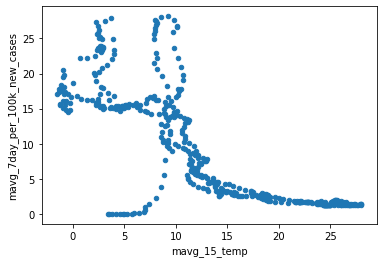

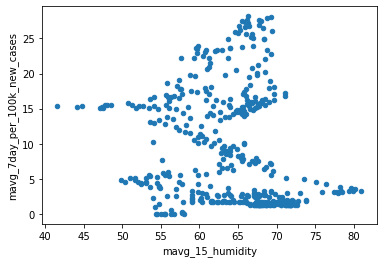

In [27]:
# Plot a scatter plot of '15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'
NY_Combined_Reg.plot(kind='scatter', x='mavg_15_temp', y='mavg_7day_per_100k_new_cases')
NY_Combined_Reg.plot(kind='scatter', x='mavg_15_humidity', y='mavg_7day_per_100k_new_cases')

### Simple Linear Regression Model- TEMPRETURE, HUMIDITY with MAVG_7day_per_100k_new_cases

In [28]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Use the Sklearn `train_test_split()` function to split the data into training and testing data

In [29]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_NY_both = NY_Combined_Reg[["mavg_15_temp","mavg_15_humidity"]]
y_NY_both = NY_Combined_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_NY_both.shape, y_NY_both.shape)
#print(X_NY_both)
#print(y_NY_both)

Shape:  (443, 2) (443, 1)


In [30]:
#WE are not splitting the data as we want to use all data into the train  


In [31]:
# Create the model
model_NY_both = linear_model.LinearRegression()

In [32]:
# Fit the model to the training data. 
#model.fit(X_train, y_train)
model_NY_both.fit(X_NY_both, y_NY_both)

LinearRegression()

In [33]:
# Use our model to make predictions
predicted = model_NY_both.predict(X_NY_both)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_NY_both, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_NY_both, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"Regression Report using All 14.5 months data ,temperature and humidity for NYC ONLY")
print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_NY_both.coef_)
print('intercept:', model_NY_both.intercept_)


Regression Report using All 14.5 months data ,temperature and humidity for NYC ONLY
mean squared error (MSE): 26.14873887863949
R-squared (R2): 0.5994502644121156
Coefficients: 
 [[-0.79145292  0.14536244]]
intercept: [10.09588598]


In [34]:
# Call the `score()` method on the model to show the R2 score
print(f"Regression accuracy score using All 14.5 months data ,temperature and humidity for NYC ONLY")
model_NY_both.score(X_NY_both, y_NY_both)

Regression accuracy score using All 14.5 months data ,temperature and humidity for NYC ONLY


0.5994502644121156

## Linear Regression- Sao Paulo alone

In [36]:
print(SP_Combined_df.shape)
SP_Combined_df.head()

(443, 13)


,Extract_Date,Reported_Date,City,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,2021-05-30,2020-02-29,Sao Paulo,0,0.20,0.00,0.0,20.47,85.96,20.224286,83.507143,22.213333,80.343333
444,2021-05-30,2020-03-01,Sao Paulo,0,0.17,0.00,0.0,19.50,85.50,20.374286,83.578571,22.159333,80.812667
445,2021-05-30,2020-03-02,Sao Paulo,0,0.14,0.00,0.0,19.61,85.81,20.490000,84.471429,21.902000,81.646000
446,2021-05-30,2020-03-03,Sao Paulo,0,0.14,0.00,0.0,19.17,85.53,20.321429,85.334286,21.606667,82.187333
447,2021-05-30,2020-03-04,Sao Paulo,1,0.29,0.01,0.0,19.61,79.08,19.787143,85.832857,21.242000,82.764000


In [37]:
SP_Combined_Reg= SP_Combined_df.drop(["Reported_Date","City"], axis=1)
SP_Combined_Reg.head()

,Extract_Date,New_Cases,mavg_7day_new_cases,new_cases_per_100K,mavg_7day_per_100k_new_cases,daily_temp,daily_humidity,mavg_7_temp,mavg_7_humidity,mavg_15_temp,mavg_15_humidity
443,2021-05-30,0,0.20,0.00,0.0,20.47,85.96,20.224286,83.507143,22.213333,80.343333
444,2021-05-30,0,0.17,0.00,0.0,19.50,85.50,20.374286,83.578571,22.159333,80.812667
445,2021-05-30,0,0.14,0.00,0.0,19.61,85.81,20.490000,84.471429,21.902000,81.646000
446,2021-05-30,0,0.14,0.00,0.0,19.17,85.53,20.321429,85.334286,21.606667,82.187333
447,2021-05-30,1,0.29,0.01,0.0,19.61,79.08,19.787143,85.832857,21.242000,82.764000


### Regression- 15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'

<AxesSubplot:xlabel='mavg_15_humidity', ylabel='mavg_7day_per_100k_new_cases'>

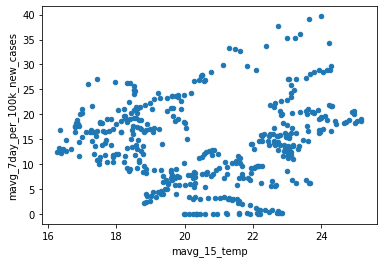

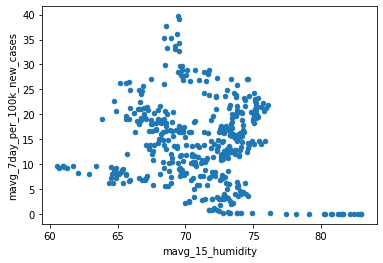

In [38]:
# Plot a scatter plot of '15 Day Avg Temp' and '15 Day Avg Humidity' against 'mavg_7day_per_100k_new_cases'
SP_Combined_Reg.plot(kind='scatter', x='mavg_15_temp', y='mavg_7day_per_100k_new_cases')
SP_Combined_Reg.plot(kind='scatter', x='mavg_15_humidity', y='mavg_7day_per_100k_new_cases')

### Simple Linear Regression Model- TEMPRETURE, HUMIDITY with MAVG_7day_per_100k_new_cases

In [46]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Use the Sklearn `train_test_split()` function to split the data into training and testing data

In [47]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_SP_both = SP_Combined_Reg[["mavg_15_temp","mavg_15_humidity"]]
y_SP_both = SP_Combined_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_SP_both.shape, y_SP_both.shape)
#print(X_SP_both)
#print(y_SP_both)



Shape:  (443, 2) (443, 1)


In [48]:
#WE are not splitting the data as we want to use all data into the train  
#split the data
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.60,test_size=0.40, random_state=42)

In [49]:
# Create the model
model_SP_both = linear_model.LinearRegression()

In [50]:
# Fit the model to the training data. 
model_SP_both.fit(X_SP_both, y_SP_both)

LinearRegression()

In [51]:
# Use our model to make predictions
predicted = model_SP_both.predict(X_SP_both)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_SP_both, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_SP_both, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"Regression Report using All 14.5 months data ,temperature and humidity for SPC ONLY")
print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_SP_both.coef_)
print('intercept:', model_SP_both.intercept_)

Regression Report using All 14.5 months data ,temperature and humidity for SPC ONLY
mean squared error (MSE): 62.715091522372305
R-squared (R2): 0.05167092331862788
Coefficients: 
 [[ 0.40795695 -0.46836384]]
intercept: [39.05235338]


In [53]:
# Call the `score()` method on the model to show the R2 score
print(f"Regression accuracy score using All 14.5 months data ,temperature and humidity for SPC ONLY")
model_SP_both.score(X_SP_both, y_SP_both)

Regression accuracy score using All 14.5 months data ,temperature and humidity for SPC ONLY


0.05167092331862788

Modifying model to check difference if only temp is used as a variable

In [110]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape() to create this

X_SP_temp = SP_Combined_Reg["mavg_15_temp"].values.reshape(-1, 1)
y_SP_temp = SP_Combined_Reg["mavg_7day_per_100k_new_cases"].values.reshape(-1, 1)

print("Shape: ", X_SP_temp.shape, y_SP_temp.shape)
#print(X_SP_temp)
#print(y_SP_temp)


Shape:  (443, 1) (443, 1)


In [111]:
# Create the model
model_SP_temp = linear_model.LinearRegression()

In [112]:
# Fit the model to the training data. 
model_SP_temp.fit(X_SP_temp, y_SP_temp)

LinearRegression()

In [113]:
# Use our model to make predictions
predicted = model_SP_temp.predict(X_SP_temp)

# Score the predictions with mse and r2
# Calculate the mean_squared_error and the r-squared value for the testing data
mse = mean_squared_error(y_SP_temp, predicted) #There is no correct value for MSE. Simply put, the lower the value the better and 0 means the model is perfect. Since there is no correct answer, the MSE’s basic value is in selecting one prediction model over another.
r2 = r2_score(y_SP_temp, predicted) #there is also no correct answer as to what R2 should be. 100% means perfect correlation. Yet, there are models with a low R2 that are still good models.

print(f"mean squared error (MSE): {mse}")
print(f"R-squared (R2): {r2}")
print('Coefficients: \n', model_SP_temp.coef_)
print('intercept:', model_SP_temp.intercept_)

mean squared error (MSE): 65.72903528872156
R-squared (R2): 0.006196186621425737
Coefficients: 
 [[0.28607747]]
intercept: [8.25924912]


In [ ]:
# Call the `score()` method on the model to show the R2 score
model_SP_temp.score(X_SP_temp, y_SP_temp)